In [95]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [96]:
def centroid_histogram(clt):
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	hist = hist.astype("float")
	hist /= hist.sum()
	return hist

def plot_colors(hist, centroids):
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	for (percent, color) in zip(hist, centroids):
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	return bar

In [114]:
img1 = cv2.imread("images/sunset1.jpg")
# img2 = cv2.imread("images/sunset2.jpeg")
img2 = cv2.imread("images/sunset1.jpg")
# img2 = cv2.imread("images/fondvert.png")
# img2 = cv2.imread("images/test.jpg")
# img2 = cv2.imread("images/winxp.webp")
lab_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2Lab)
lab_img1 = lab_img1.transpose(2,0,1).reshape(3,-1)
lab_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2Lab)
lab_img2 = lab_img2.transpose(2,0,1).reshape(3,-1)
df1 = pd.DataFrame(lab_img1.T)
df2 = pd.DataFrame(lab_img2.T)

In [115]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df1)

KMeans(n_clusters=5)

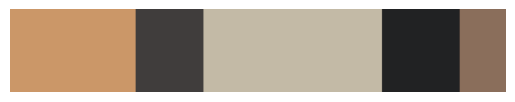

In [116]:
hist = centroid_histogram(kmeans)
lab1 = kmeans.cluster_centers_.astype("uint8")
lab1 = lab1.reshape(1, len(lab1), 3)
rgb1 = cv2.cvtColor(lab1, cv2.COLOR_Lab2RGB).reshape(len(lab1[0]), 3)
bar = plot_colors(hist, rgb1)
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [117]:
kmeans.fit(df2)

KMeans(n_clusters=5)

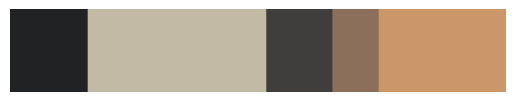

In [118]:
hist = centroid_histogram(kmeans)
lab2 = kmeans.cluster_centers_.astype("uint8")
lab2 = lab2.reshape(1, len(lab2), 3)
rgb2 = cv2.cvtColor(lab2, cv2.COLOR_Lab2RGB).reshape(len(lab2[0]), 3)
bar = plot_colors(hist, rgb2)
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [120]:
def calculate_similarity(c1, c2):
    distances = []
    for i in range(len(c1)):
        distances.append(cdist(c1[i], c2[i], metric='euclidean'))
    min_distances = np.min(distances, axis=1)
    print("distance matrix",distances)
    print("list of min distances: ",min_distances)
    similarity = np.mean(min_distances)
    print("Avg distance: ",similarity)
    
calculate_similarity(lab1, lab2)

distance matrix [array([[139.67820159,  34.82814953, 107.39646177,  47.54997371,
          0.        ],
       [ 32.07802986, 127.39701723,   1.        ,  61.04096985,
        108.34666585],
       [159.45218719,   0.        , 126.40015823,  68.5857128 ,
         34.82814953],
       [  1.        , 160.44936896,  34.07345007,  93.72299611,
        140.64494303],
       [ 91.76055798,  69.57729515,  59.11006682,   1.        ,
         48.47679857]])]
list of min distances:  [[1. 0. 1. 1. 0.]]
Avg distance:  0.6
